# 데이터 수집

### 필요 라이브러리 설치

In [1]:
!pip install -U finance-datareader

In [2]:
!pip install bs4

In [3]:
!pip install scikit-learn

In [4]:
!pip install matplotlib

### 필요 라이브러리 import

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

### 데이터 준비

In [83]:
df = fdr.DataReader('005930', '2023-01-01', '2024-02-28')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746
...,...,...,...,...,...,...
2024-02-22,73800,73900,72700,73100,15208934,0.001370
2024-02-23,73600,74200,72900,72900,16225166,-0.002736
2024-02-26,72300,73200,72200,72800,14669352,-0.001372


<Axes: xlabel='Date'>

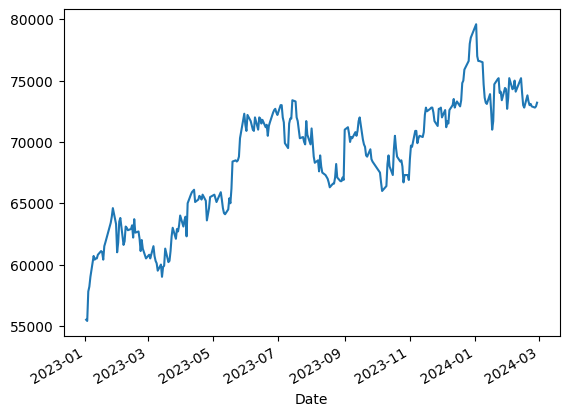

In [84]:
df = fdr.DataReader('005930', '2023-01-01', '2024-02-28').loc[:,'Close']
df.plot()

### 데이터 정규화

<Axes: xlabel='Date'>

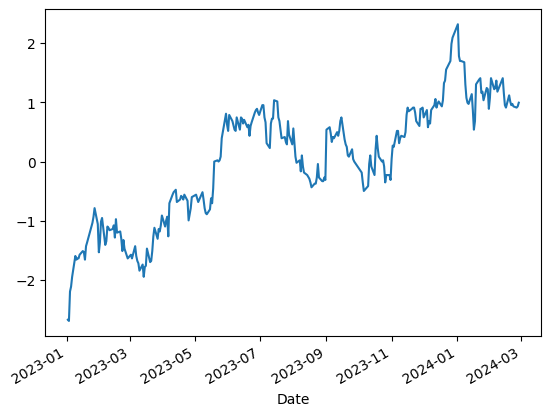

In [86]:
# z-value
df = (df - df.mean())/df.std()
df.plot()

<Axes: xlabel='Date'>

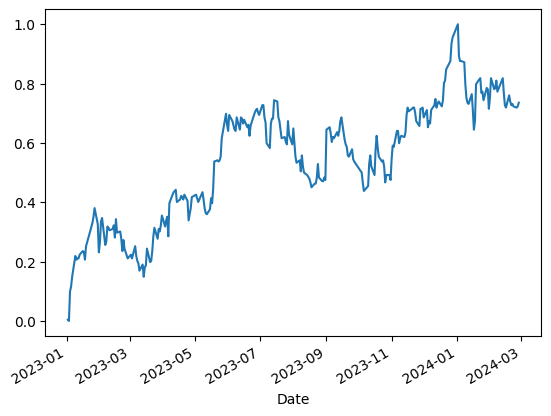

In [87]:
# min-max
df = (df - df.min())/(df.max() - df.min())
df.plot()

### 검증 데이터 분리

In [77]:
# 기간 필터링
demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14')]
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28')]
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


Date
2024-02-15    73000
2024-02-16    72800
2024-02-19    73800
2024-02-20    73300
2024-02-21    73000
2024-02-22    73100
2024-02-23    72900
2024-02-26    72800
2024-02-27    72900
2024-02-28    73200
Name: Close, dtype: int64

<Axes: xlabel='Date'>

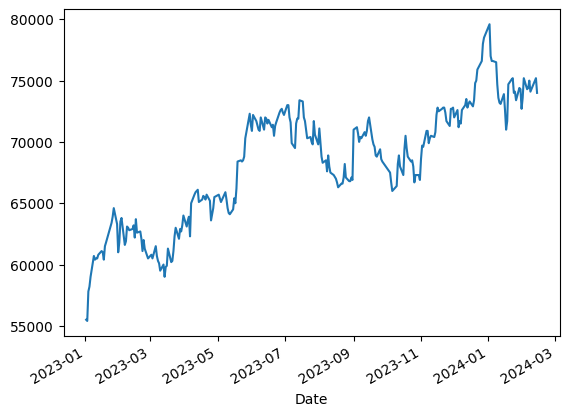

In [78]:
demands.plot()

<Axes: xlabel='Date'>

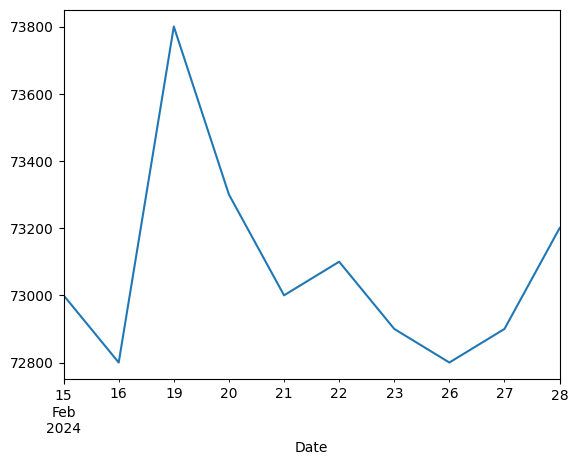

In [79]:
test_demands.plot()

### Moving average 구하기

In [70]:
demands.head(10)

Date
2023-01-02   -2.672181
2023-01-03   -2.692909
2023-01-04   -2.195434
2023-01-05   -2.112522
2023-01-06   -1.946697
2023-01-09   -1.594319
2023-01-10   -1.656503
2023-01-11   -1.635775
2023-01-12   -1.635775
2023-01-13   -1.573591
Name: Close, dtype: float64

In [71]:
# rolling https://wikidocs.net/152788

ma3 = demands.rolling(window=3, min_periods=1).mean()
print(ma3)
ma20 = demands.rolling(window=20, min_periods=1).mean()
ma60 = demands.rolling(window=60, min_periods=1).mean()

Date
2023-01-02   -2.672181
2023-01-03   -2.682545
2023-01-04   -2.520175
2023-01-05   -2.333622
2023-01-06   -2.084884
                ...   
2024-02-06    1.293798
2024-02-07    1.279979
2024-02-08    1.266160
2024-02-13    1.321435
2024-02-14    1.252342
Name: Close, Length: 275, dtype: float64


### 시각화

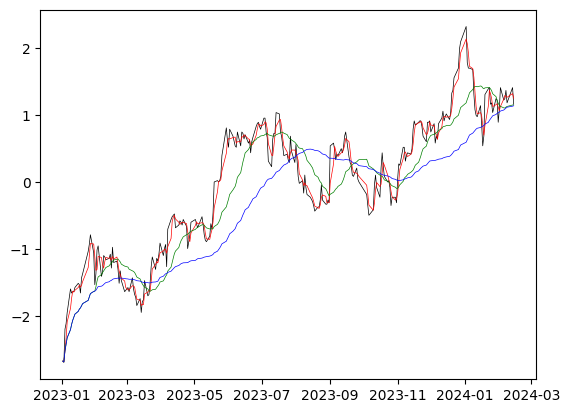

In [72]:
import matplotlib.pyplot as plt

plt.plot(demands, label='actual', linestyle='solid', color='black', linewidth=0.5)
plt.plot(ma3, label='ma3', linestyle='solid', color='red', linewidth=0.5)
plt.plot(ma20, label='ma20', linestyle='solid', color='green', linewidth=0.5)
plt.plot(ma60, label='ma60', linestyle='solid', color='blue', linewidth=0.5)

plt.show()

###  10일 (test_demand) 예측해보기

In [80]:
# ma3로 예측
window_size = 3
windows = demands.tail(window_size).values
predicts = []
for i in range(len(test_demands)):
    p = np.mean(windows[-3:])
    predicts.append((p))
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands.to_list()}')

predicts: [np.float64(74433.33333333333), np.float64(74544.44444444444), np.float64(74325.92592592591), np.float64(74434.56790123455), np.float64(74434.9794238683), np.float64(74398.49108367624), np.float64(74422.67946959303), np.float64(74418.71665904585), np.float64(74413.29573743837), np.float64(74418.23062202575)]
test_demands: [73000, 72800, 73800, 73300, 73000, 73100, 72900, 72800, 72900, 73200]


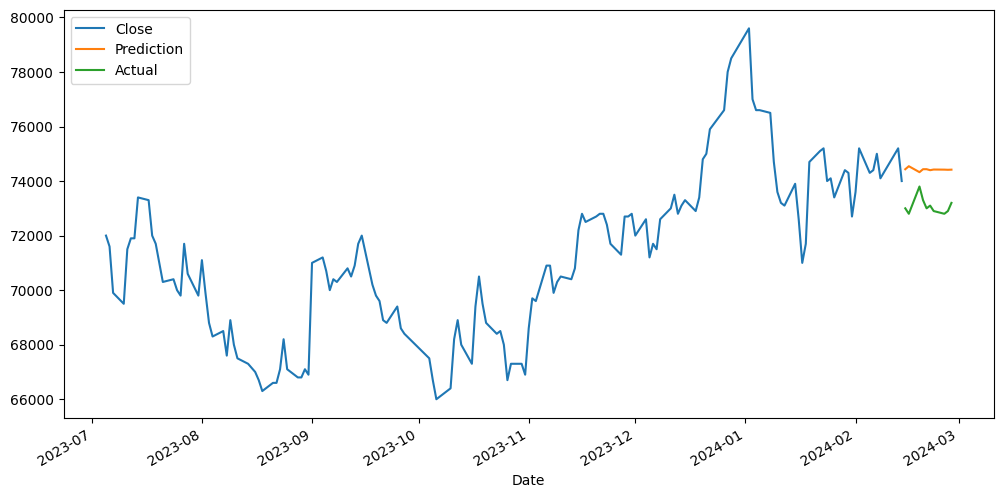

In [81]:
fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(150).plot(ax =ax)
ax.plot(test_demands.index, predicts, label='Prediction')
ax.plot(test_demands.index, test_demands.to_list(), label='Actual')
ax.legend(loc='upper left')
plt.show()

### 평가

In [82]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print('MSE:', MSE(predicts, test_demands.to_list()))
print('MAE:', MAE(predicts, test_demands.to_list()))
print('MAPE:', MAPE(predicts, test_demands.to_list()))

MSE: 1911956.453436543
MAE: 1344.466460058576
MAPE: 0.01806256960851083


### norm_z로 예측해 보기

In [48]:
# ma3로 예측
window_size = 3
windows = demands_norm_z.tail(window_size).values
print(windows)
predicts = []
for i in range(len(demands_norm_z)):
    p = np.mean(windows[-3:])
    predicts.append(p)
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands_norm_z.to_list()}')

[1.21819318 1.44612875 1.19747176]
predicts: [np.float64(1.2872645620462928), np.float64(1.310288357000715), np.float64(1.2650082269236844), np.float64(1.2875203819902306), np.float64(1.2876056553048765), np.float64(1.2800447547395972), np.float64(1.2850569306782347), np.float64(1.2842357802409028), np.float64(1.2831124885529117), np.float64(1.2841350664906832), np.float64(1.283827778428166), np.float64(1.2836917778239203), np.float64(1.2838848742475897), np.float64(1.283801476833225), np.float64(1.2837927096349118), np.float64(1.2838263535719088), np.float64(1.2838068466800152), np.float64(1.2838086366289454), np.float64(1.2838139456269566), np.float64(1.2838098096453059), np.float64(1.2838107973004027), np.float64(1.2838115175242217), np.float64(1.2838107081566434), np.float64(1.2838110076604226), np.float64(1.2838110777804292), np.float64(1.283810931199165), np.float64(1.2838110055466723), np.float64(1.2838110048420888), np.float64(1.2838109805293085), np.float64(1.2838109969726899)

1. MA의 평가방법
오늘 계산 값은 내일의 예측값 (20일 ma 값 -> 21일 act 값과 비교)

2. 지표
https://rfriend.tistory.com/667
MSE, MAE

In [19]:

for z in zip(demands[1:].to_list(), ma3[:-1].to_list()):
    print(z)

(55400, 55500.0)
(57800, 55450.0)
(58200, 56233.333333333336)
(59000, 57133.333333333336)
(60700, 58333.333333333336)
(60400, 59300.0)
(60500, 60033.333333333336)
(60500, 60533.333333333336)
(60800, 60466.666666666664)
(61100, 60600.0)
(61000, 60800.0)
(60400, 60966.666666666664)
(61500, 60833.333333333336)
(61800, 60966.666666666664)
(63400, 61233.333333333336)
(63900, 62233.333333333336)
(64600, 63033.333333333336)
(63300, 63966.666666666664)
(61000, 63933.333333333336)
(61800, 62966.666666666664)
(63500, 62033.333333333336)
(63800, 62100.0)
(61600, 63033.333333333336)
(61900, 62966.666666666664)
(63100, 62433.333333333336)
(63000, 62200.0)
(62800, 62666.666666666664)
(62900, 62966.666666666664)
(63200, 62900.0)
(62200, 62966.666666666664)
(63700, 62766.666666666664)
(62600, 63033.333333333336)
(62700, 62833.333333333336)
(62100, 63000.0)
(61100, 62466.666666666664)
(62000, 61966.666666666664)
(61300, 61733.333333333336)
(60500, 61466.666666666664)
(60600, 61266.666666666664)
(60800,

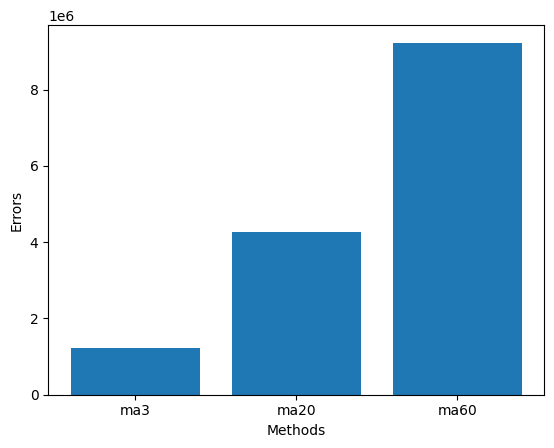

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

y = [
MSE(demands[1:].to_list(), ma3[:-1].to_list()),
MSE(demands[1:].to_list(), ma20[:-1].to_list()),
MSE(demands[1:].to_list(), ma60[:-1].to_list())]

# y2 = [
# MAE(demands[1:].to_list(), ma3[:-1].to_list()),
# MAE(demands[1:].to_list(), ma20[:-1].to_list()),
# MAE(demands[1:].to_list(), ma60[:-1].to_list())]

plt.bar(['ma3', 'ma20', 'ma60'], y)
# plt.bar(['ma3', 'ma20', 'ma60'], y2)
plt.xlabel('Methods')
plt.ylabel('Errors')
plt.show()